# Data Understanding and Preprocessing:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm,t
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from statsmodels.stats import proportion

import matplotlib
from matplotlib import pyplot as plt
import pylab 
from pylab import plot,show,legend,title,xlabel,ylabel

import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Load and inspect the dataset.
data=pd.read_csv('bankrupt.csv')

In [3]:
data.head(20)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [4]:
data.shape

(6819, 96)

In [5]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
data_bank=data['Bankrupt?']

In [8]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [9]:
data_bank

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [10]:
data['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

# Exploratory Data Analysis (EDA):

In [11]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [12]:
data.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

# Outliers

In [13]:
def impute_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Replace outliers with bounds
    data.loc[data[column] < lower_bound, column] = lower_bound
    data.loc[data[column] > upper_bound, column] = upper_bound

    return data

# List of columns to impute (excluding 'Bankrupt?')
columns_to_impute = data.columns.difference(['Bankrupt?','Current Liability to Current Assets','Net Income Flag'])

# Apply the imputation function to each column
for column in columns_to_impute:
    data = impute_outliers(data, column)

# Check the counts of 'Bankrupt?' after imputation
print(data['Bankrupt?'].value_counts())

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


In [14]:
#Check null and duplicates
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
data.count()

Bankrupt?                                                   6819
 ROA(C) before interest and depreciation before interest    6819
 ROA(A) before interest and % after tax                     6819
 ROA(B) before interest and depreciation after tax          6819
 Operating Gross Margin                                     6819
                                                            ... 
 Liability to Equity                                        6819
 Degree of Financial Leverage (DFL)                         6819
 Interest Coverage Ratio (Interest expense to EBIT)         6819
 Net Income Flag                                            6819
 Equity to Liability                                        6819
Length: 96, dtype: int64

In [17]:
{column:len(data[column].unique()) for column in data.columns}

{'Bankrupt?': 2,
 ' ROA(C) before interest and depreciation before interest': 2967,
 ' ROA(A) before interest and % after tax': 2640,
 ' ROA(B) before interest and depreciation after tax': 2746,
 ' Operating Gross Margin': 3473,
 ' Realized Sales Gross Margin': 3482,
 ' Operating Profit Rate': 2700,
 ' Pre-tax net Interest Rate': 3049,
 ' After-tax net Interest Rate': 2783,
 ' Non-industry income and expenditure/revenue': 1556,
 ' Continuous interest rate (after tax)': 2841,
 ' Operating Expense Rate': 2966,
 ' Research and development expense rate': 1471,
 ' Cash flow rate': 4990,
 ' Interest-bearing debt interest rate': 826,
 ' Tax rate (A)': 2369,
 ' Net Value Per Share (B)': 1869,
 ' Net Value Per Share (A)': 1869,
 ' Net Value Per Share (C)': 1865,
 ' Persistent EPS in the Last Four Seasons': 948,
 ' Cash Flow Per Share': 1098,
 ' Revenue Per Share (Yuan ¥)': 3347,
 ' Operating Profit Per Share (Yuan ¥)': 889,
 ' Per Share Net profit before tax (Yuan ¥)': 1101,
 ' Realized Sales G

In [18]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505667,0.560507,0.554691,0.607834,0.607812,0.999028,0.797467,0.809378,0.303526,...,0.810070,0.003750,0.623890,0.607833,0.841060,0.279689,0.026846,0.565422,1.0,0.042019
std,0.176710,0.051483,0.050087,0.050277,0.010758,0.010725,0.000120,0.000189,0.000157,0.000124,...,0.027735,0.003805,0.000553,0.010758,0.002057,0.003566,0.000138,0.000627,0.0,0.023671
min,0.000000,0.387973,0.455122,0.442034,0.580240,0.580321,0.998781,0.797096,0.809075,0.303288,...,0.752193,0.000000,0.622838,0.580237,0.836752,0.270187,0.026608,0.564309,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,0.000904,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,0.002085,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,0.005270,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,0.624116,0.669579,0.669348,0.634118,0.633954,0.999282,0.797868,0.809706,0.303764,...,0.871012,0.011819,0.624966,0.634119,0.845720,0.288207,0.027096,0.566574,1.0,0.095380


In [19]:
corr_matrix=data.corr()

In [20]:
corr_matrix

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.239543,-0.239500,-0.241993,-0.140042,-0.139272,-0.193856,-0.238036,-0.239484,-0.214507,...,-0.255797,0.065817,-0.110684,-0.140041,-0.251917,0.246176,-0.129292,-0.110761,NaN,-0.161036
ROA(C) before interest and depreciation before interest,-0.239543,1.000000,0.941564,0.988614,0.471126,0.468962,0.794920,0.823454,0.810364,0.410102,...,0.930357,-0.007035,0.162347,0.471121,0.890314,-0.258969,0.111443,0.099427,NaN,0.185974
ROA(A) before interest and % after tax,-0.239500,0.941564,1.000000,0.952666,0.471641,0.469330,0.796013,0.876436,0.877649,0.505969,...,0.990799,0.000936,0.174670,0.471638,0.952613,-0.254115,0.153120,0.140903,NaN,0.186650
ROA(B) before interest and depreciation after tax,-0.241993,0.988614,0.952666,1.000000,0.481338,0.479152,0.800215,0.829183,0.831419,0.412237,...,0.942100,0.004209,0.153183,0.481333,0.900832,-0.263275,0.126218,0.115781,NaN,0.191511
Operating Gross Margin,-0.140042,0.471126,0.471641,0.481338,1.000000,0.999262,0.636798,0.542617,0.543808,0.108015,...,0.479768,-0.190797,0.083487,1.000000,0.426141,-0.336175,0.012177,0.000099,NaN,0.377930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.246176,-0.258969,-0.254115,-0.263275,-0.336175,-0.336713,-0.215333,-0.300301,-0.300023,-0.271458,...,-0.297587,0.124385,-0.307483,-0.336172,-0.204635,1.000000,0.119887,0.150937,NaN,-0.787970
Degree of Financial Leverage (DFL),-0.129292,0.111443,0.153120,0.126218,0.012177,0.012095,0.150584,0.191819,0.202088,0.161351,...,0.152773,0.042743,-0.063156,0.012178,0.227650,0.119887,1.000000,0.904464,NaN,-0.169646
Interest Coverage Ratio (Interest expense to EBIT),-0.110761,0.099427,0.140903,0.115781,0.000099,-0.000544,0.139218,0.171559,0.182419,0.139235,...,0.136774,0.057851,-0.084002,0.000103,0.207104,0.150937,0.904464,1.000000,NaN,-0.189878
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


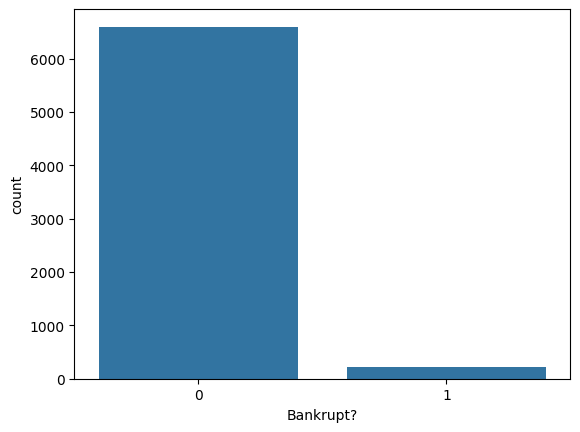

In [21]:
# Histogram of target variable
sns.countplot(x='Bankrupt?', data=data)
plt.show()

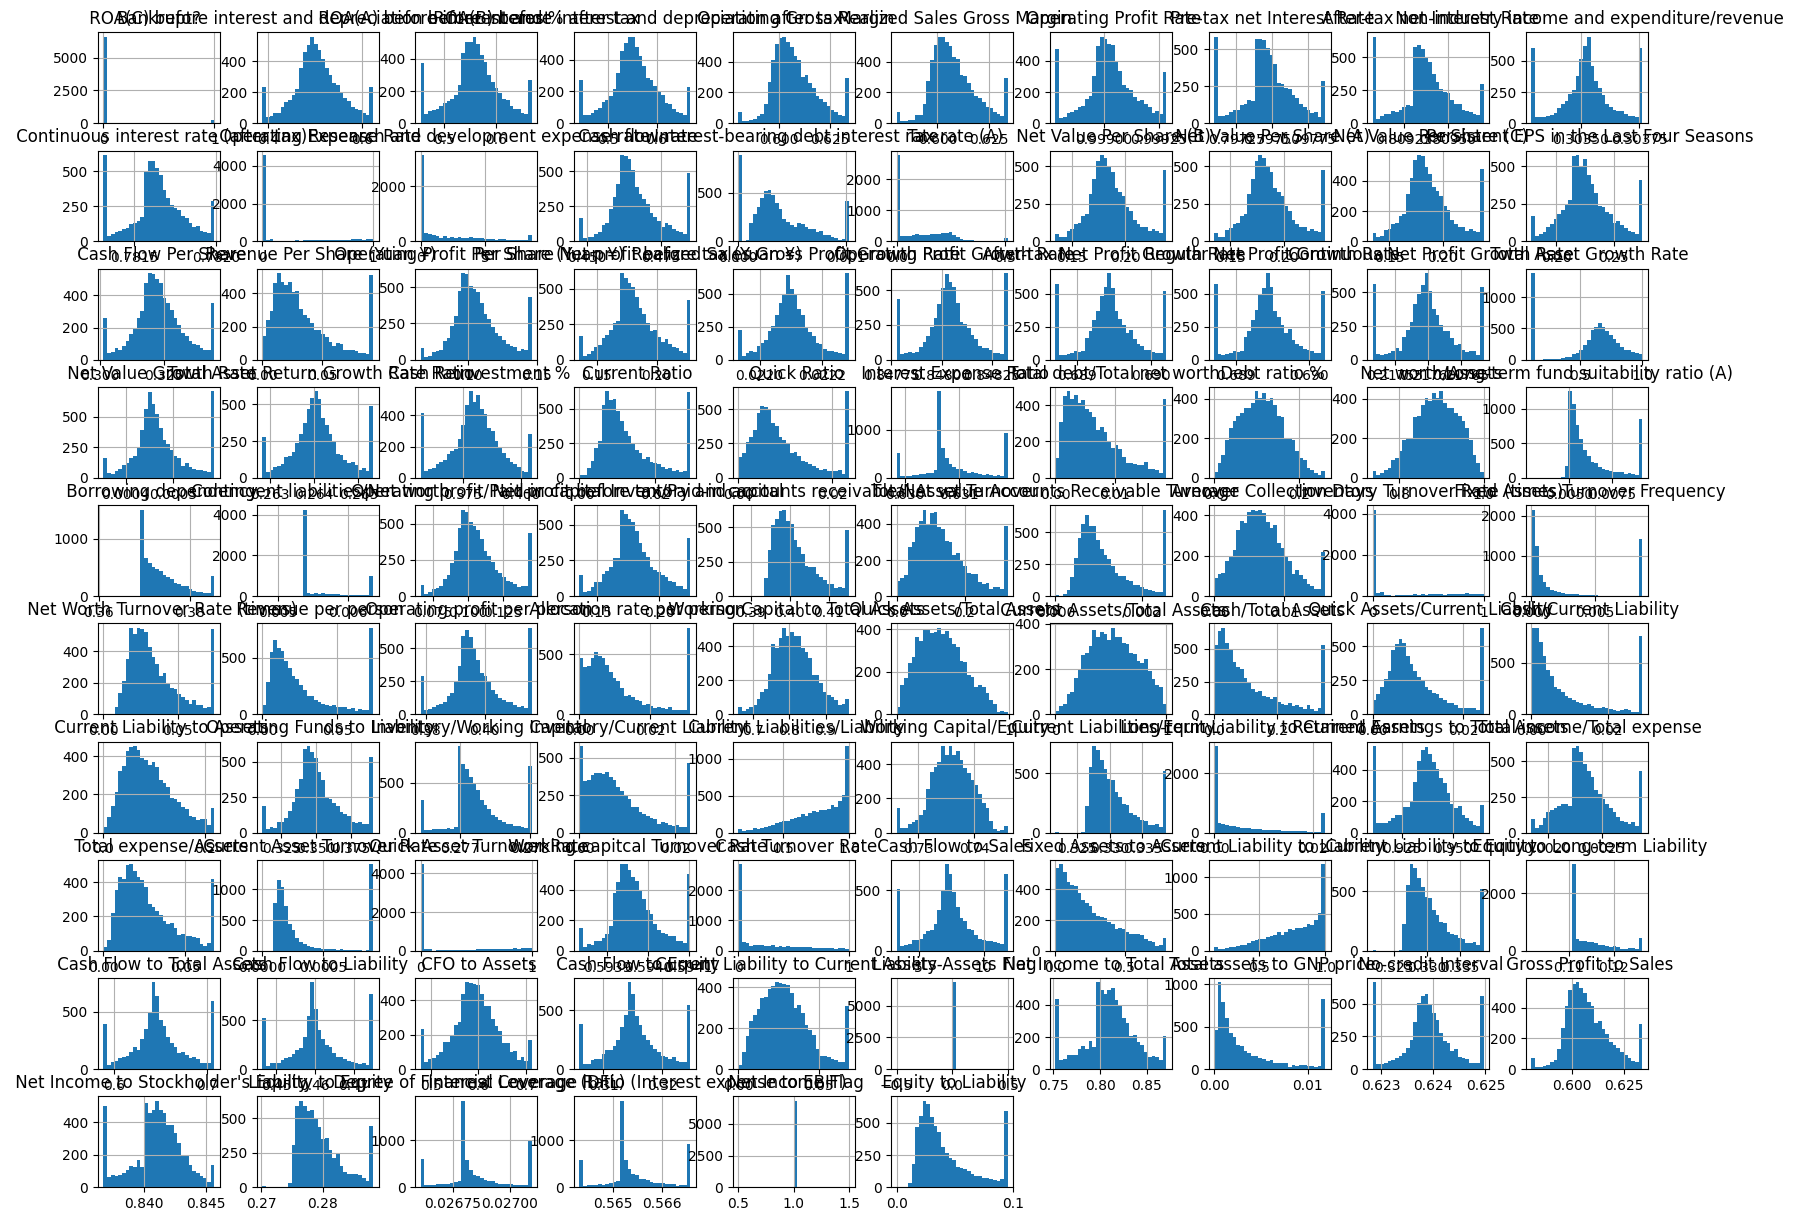

In [22]:
# Histograms for features
data.hist(bins=30, figsize=(20, 15))
plt.show()

# Analyze Relationships Between Features and Target Variable

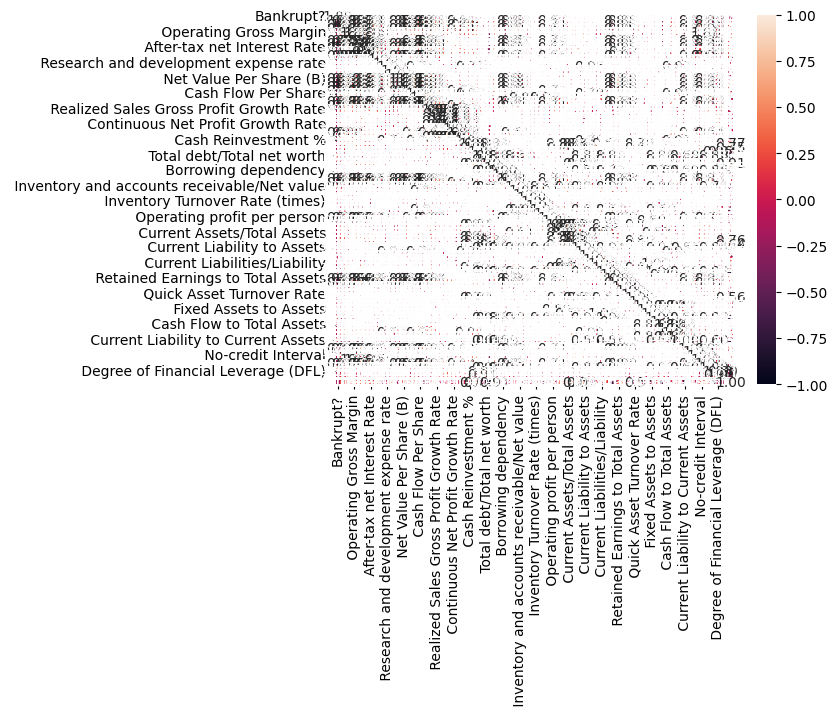

In [23]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()

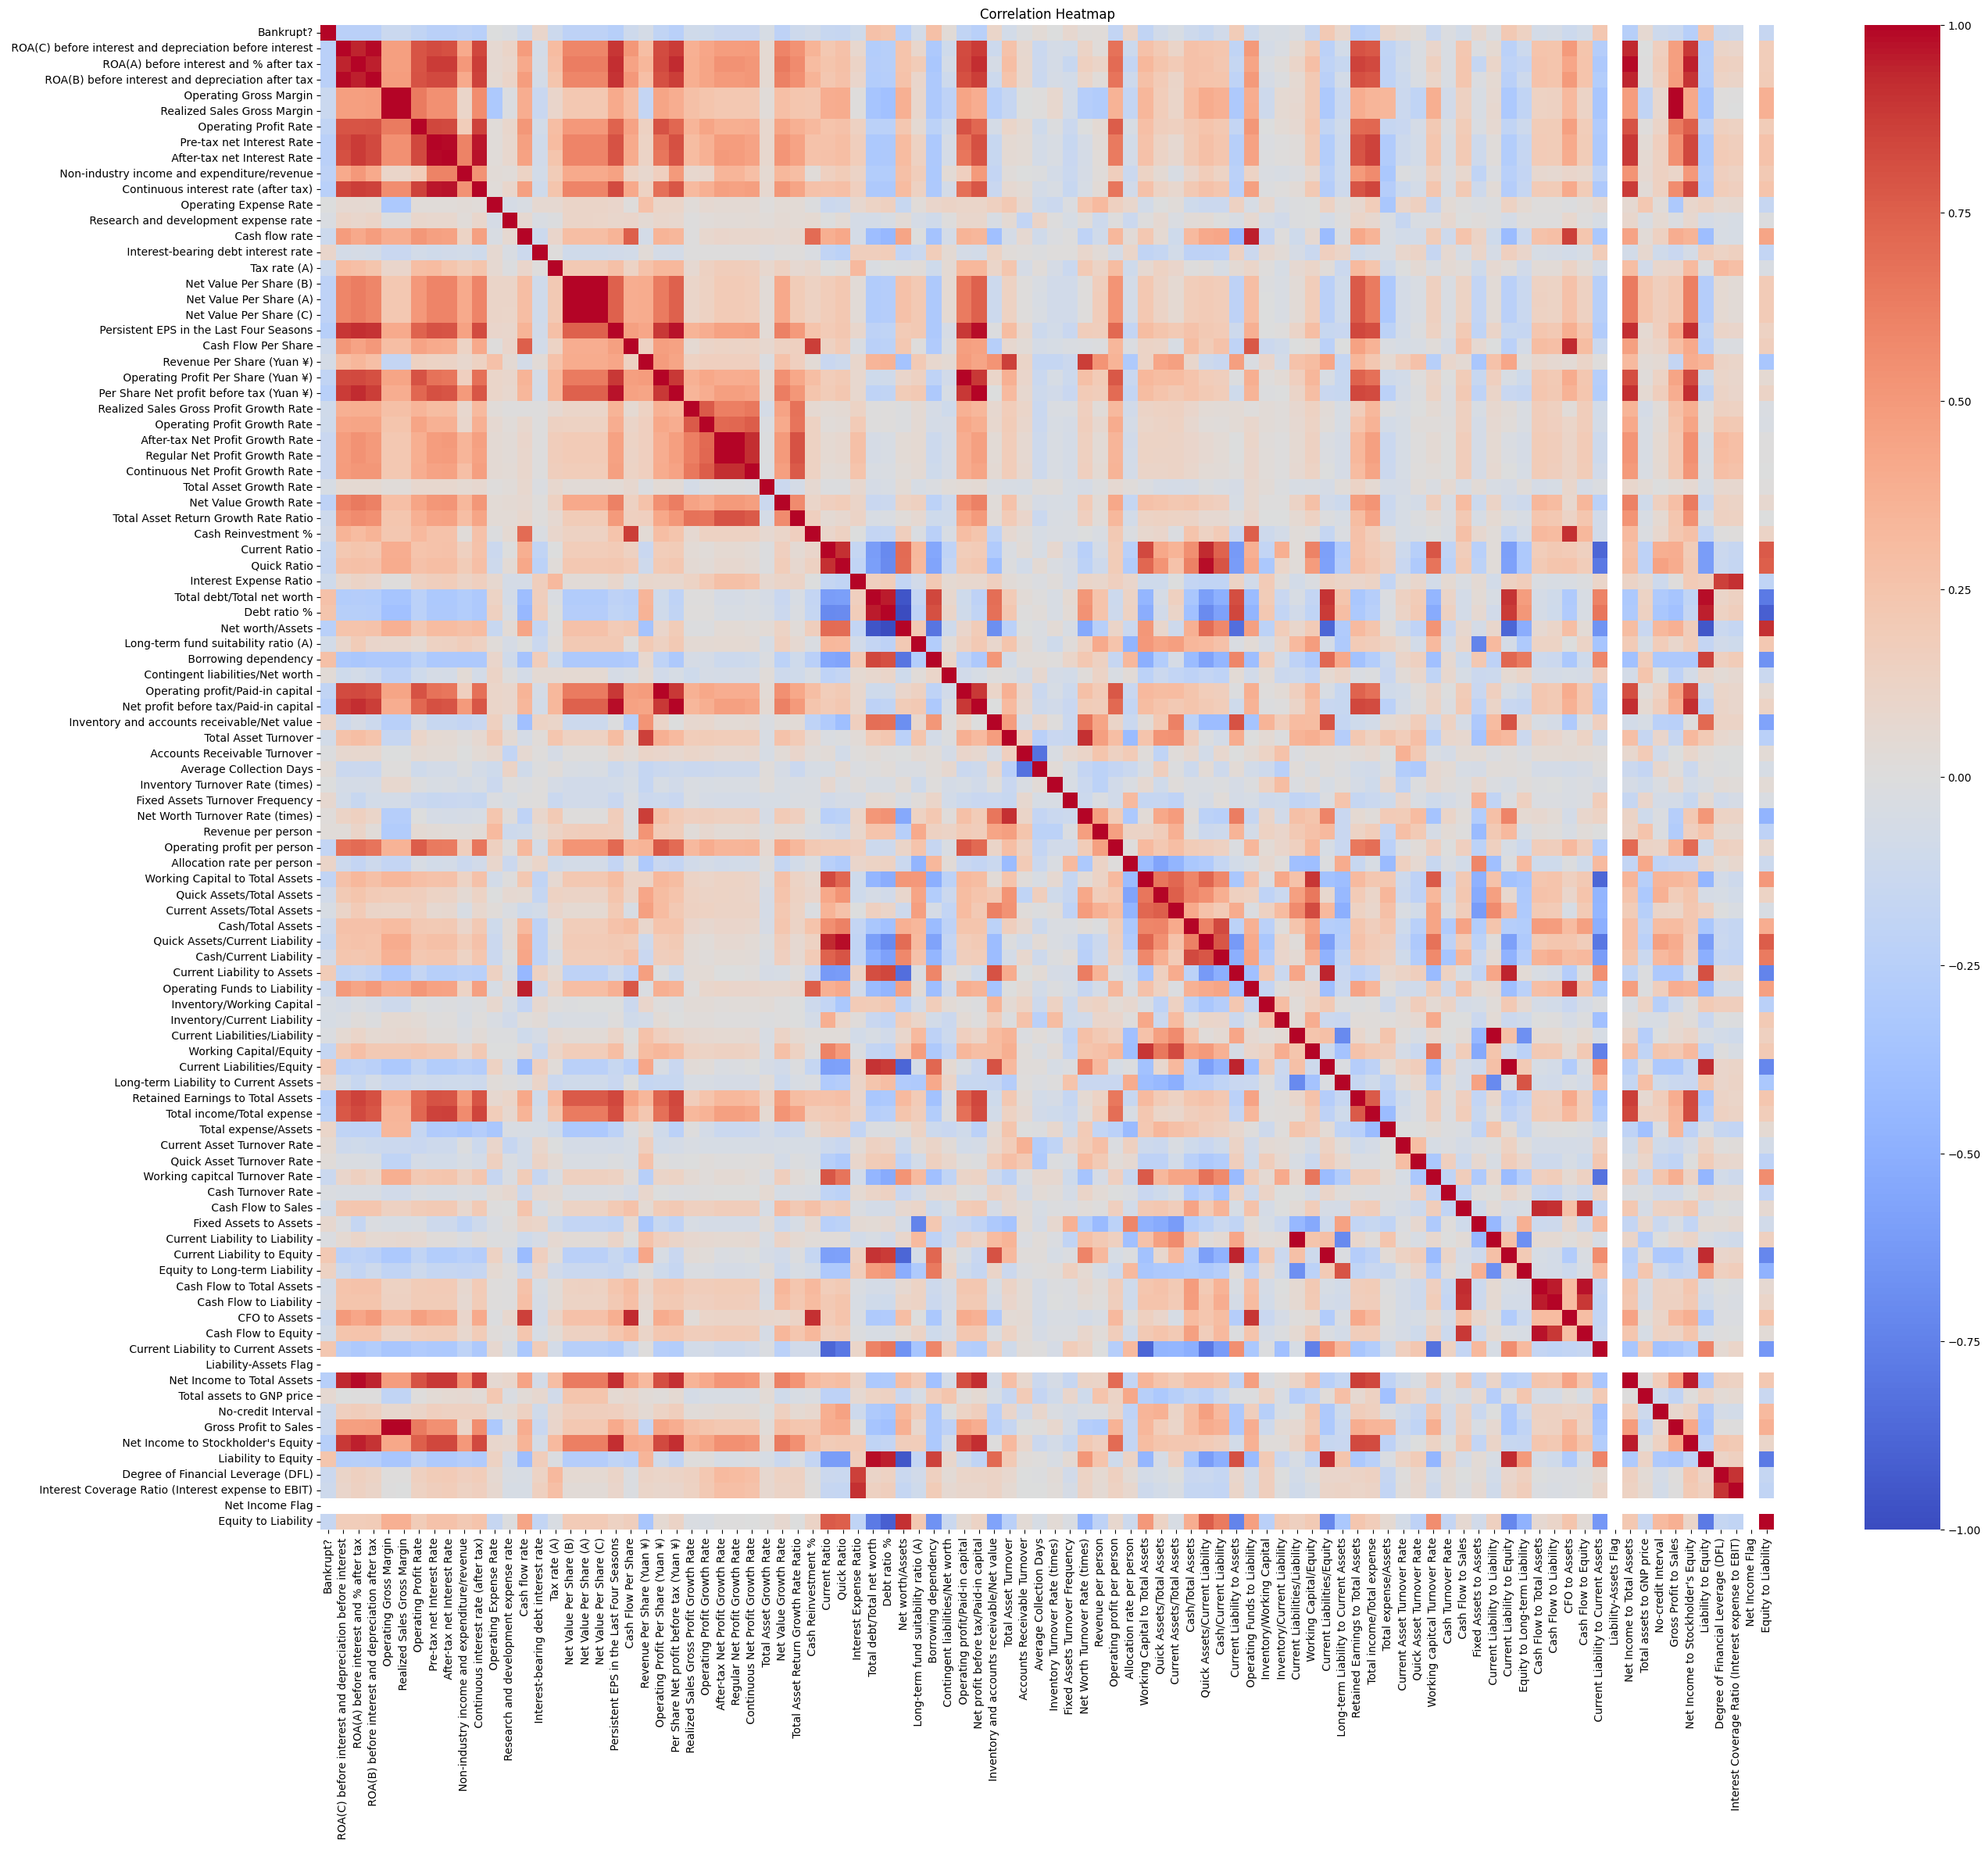

In [24]:
plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [25]:
from scipy.stats import zscore

predictor_columns = data.columns[data.columns != 'Bankrupt?']
z_scores = data[predictor_columns].apply(zscore)
z_scores.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,-2.286227,-2.104191,-2.240903,-0.592802,-0.592542,-0.485462,-1.968692,-1.923830,-1.924295,-1.943086,...,-2.086986,1.437549,-1.826713,-0.593000,-2.094433,2.388616,-1.722778,-1.773674,NaN,-1.079480
1,-0.803746,-0.445120,-0.755089,0.223183,0.225966,-0.678229,-0.463016,-0.489330,0.245699,-0.789839,...,-0.532699,1.202013,-0.430231,0.223464,-0.530164,1.165743,1.808522,1.837215,NaN,-0.896730
2,-1.546170,-1.227716,-1.638963,-0.593472,-0.601278,-1.413812,-1.968692,-1.923830,-1.924295,-1.943086,...,-1.276498,2.120807,-0.088158,-0.593367,-2.083372,2.388616,-1.722778,-1.773674,NaN,-1.079253
3,-2.055640,-2.104191,-1.928618,-2.258269,-2.263159,-2.045579,-1.968692,-1.923830,-1.426231,-1.943086,...,-2.086986,-0.130777,-1.736811,-2.258388,-2.094433,0.569877,-1.082375,-1.208597,NaN,-0.762040
4,-0.789541,-0.440767,-0.644338,-0.841349,-0.841858,-0.452855,-0.537877,-0.470291,-0.412526,-0.525131,...,-0.542841,0.033518,-0.667039,-0.841360,-0.528473,-0.329593,-1.722778,1.837215,NaN,-0.275848


In [26]:
# Extract the correlation of each feature with the target variable
target_correlation = corr_matrix['Bankrupt?'].sort_values(ascending=False)

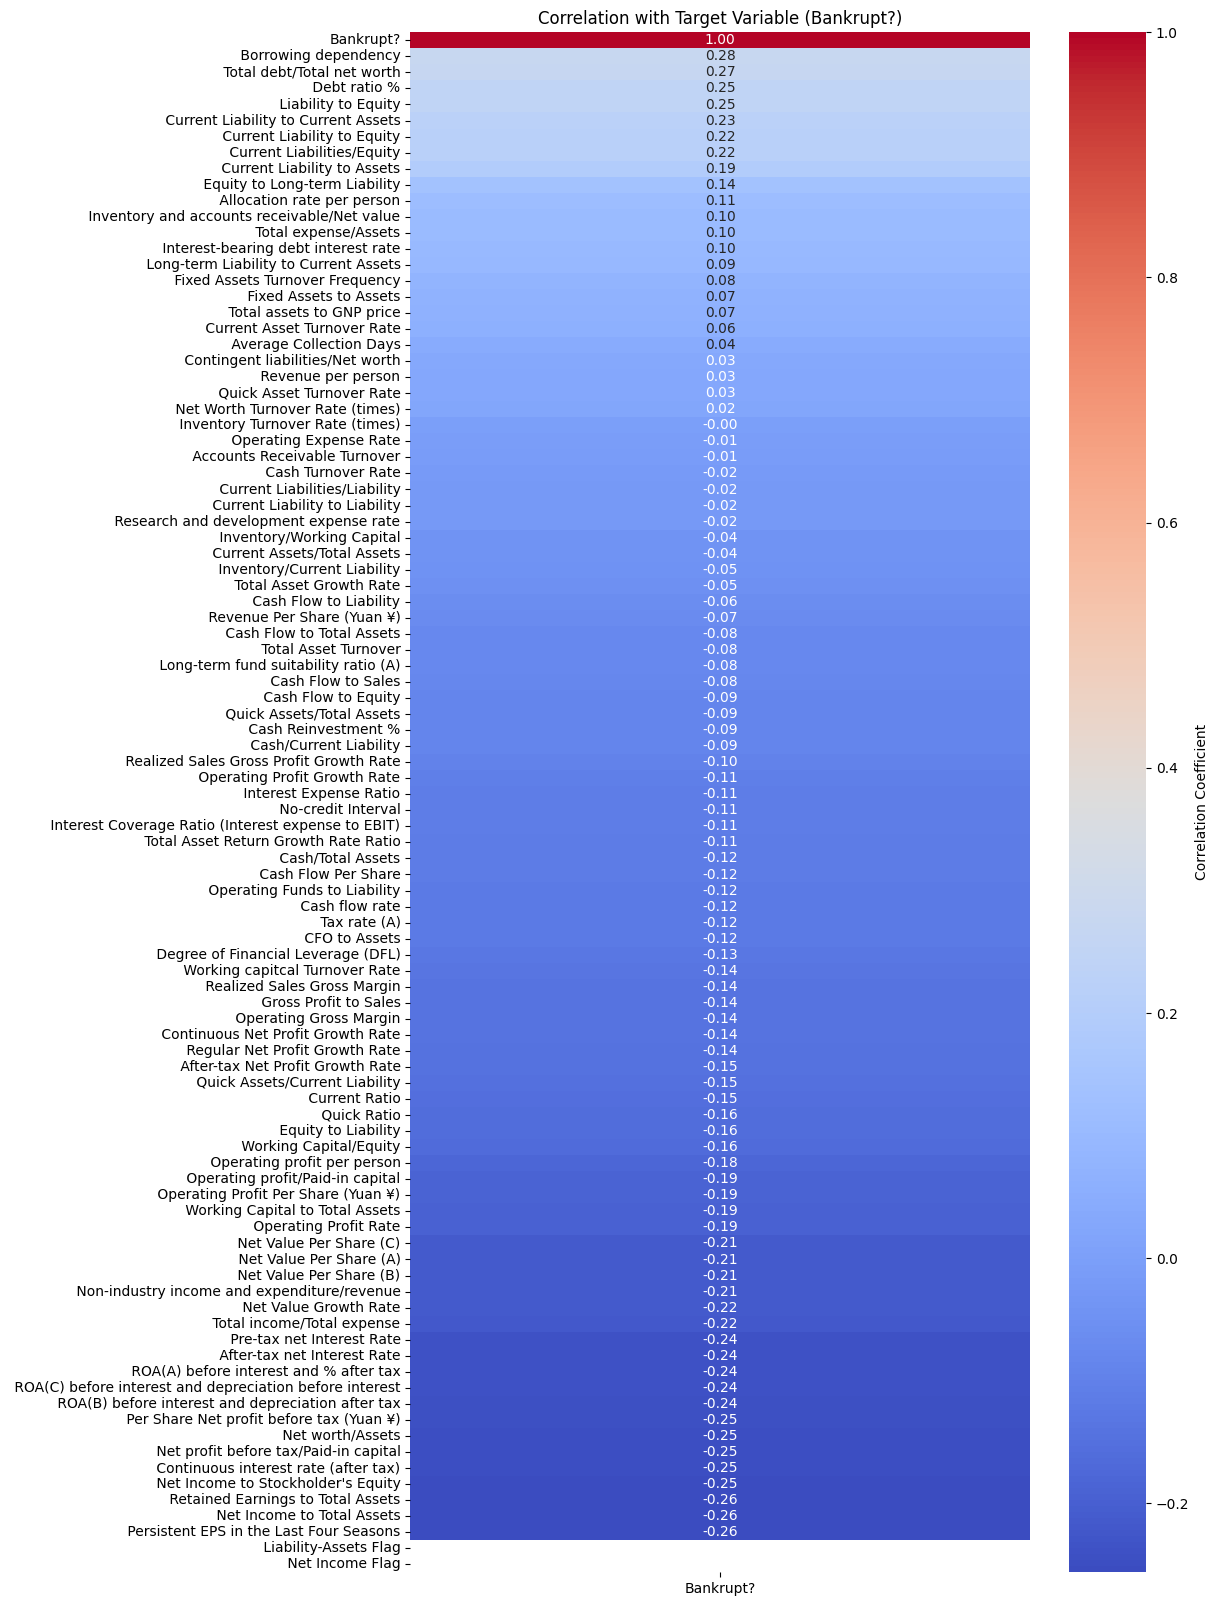

In [27]:
# Plot the correlations with the target variable
plt.figure(figsize=(10, 20))
sns.heatmap(target_correlation.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation with Target Variable (Bankrupt?)')
plt.show()

In [28]:
target_correlation = corr_matrix['Bankrupt?']
(target_correlation).sort_values(ascending=False) #printing correlation of each column with target column 'Bankrupt? '

Bankrupt?                                   1.000000
 Borrowing dependency                       0.278367
 Total debt/Total net worth                 0.272914
 Debt ratio %                               0.246535
 Liability to Equity                        0.246176
                                              ...   
 Retained Earnings to Total Assets         -0.255218
 Net Income to Total Assets                -0.255797
 Persistent EPS in the Last Four Seasons   -0.256159
 Liability-Assets Flag                           NaN
 Net Income Flag                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64

In [29]:
sorted_correlations = corr_matrix['Bankrupt?'].abs().sort_values(ascending=False)
#used abs to convert negative values into postitve and sort the values in descending order

In [30]:
top_10_columns = sorted_correlations[0:11].index.tolist() #extracting column names of top 10 columns

In [31]:
data = data[top_10_columns] #updating dataframe with top 20 columns

In [32]:
data

,Bankrupt?,Borrowing dependency,Total debt/Total net worth,Persistent EPS in the Last Four Seasons,Net Income to Total Assets,Retained Earnings to Total Assets,Net Income to Stockholder's Equity,Continuous interest rate (after tax),Net profit before tax/Paid-in capital,Debt ratio %,Net worth/Assets
0,1,0.385425,0.018673,0.178548,0.752193,0.910524,0.836752,0.781314,0.137757,0.207576,0.792424
1,1,0.376760,0.012502,0.208944,0.795297,0.931065,0.839969,0.781506,0.168962,0.171176,0.828824
2,1,0.379093,0.018673,0.180581,0.774670,0.910524,0.836774,0.781314,0.148036,0.207516,0.792484
3,1,0.379743,0.009572,0.193722,0.752193,0.910524,0.836752,0.781314,0.147561,0.151465,0.848535
4,1,0.375025,0.005150,0.212537,0.795016,0.913850,0.839973,0.781550,0.167461,0.106509,0.893491
...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.373823,0.006655,0.216602,0.799927,0.925611,0.840359,0.781588,0.171111,0.124618,0.875382
6815,0,0.372505,0.004623,0.216697,0.799748,0.932629,0.840306,0.781586,0.171805,0.099253,0.900747
6816,0,0.369637,0.001392,0.210929,0.797778,0.932000,0.840138,0.781546,0.172287,0.038939,0.961061
6817,0,0.369649,0.003816,0.228326,0.811808,0.939613,0.841084,0.781663,0.182498,0.086979,0.913021


In [33]:
data.shape

(6819, 11)

# Hypothesis Testing:

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Separate the bankrupt and non-bankrupt groups
bankrupt = data[data['Bankrupt?'] == 1]
non_bankrupt = data[data['Bankrupt?'] == 0]

# Perform ANOVA for each feature
anova_results = {}
for column in data.columns:
    if column != 'Bankrupt?':
        f_val, p_val = f_oneway(bankrupt[column], non_bankrupt[column])
        anova_results[column] = p_val

# Convert the results to a DataFrame
anova_results_df = pd.DataFrame(list(anova_results.items()), columns=['Feature', 'P-Value'])

# Identify significant features (e.g., p-value < 0.05)
significant_features = anova_results_df[anova_results_df['P-Value'] < 0.05]

# Display the significant features
significant_features


,Feature,P-Value
0,Borrowing dependency,1.401709e-121
1,Total debt/Total net worth,9.354384e-117
2,Persistent EPS in the Last Four Seasons,1.285066e-102
3,Net Income to Total Assets,2.533819e-102
4,Retained Earnings to Total Assets,7.462353e-102
5,Net Income to Stockholder's Equity,3.364384e-99
6,Continuous interest rate (after tax),1.467886e-96
7,Net profit before tax/Paid-in capital,1.104994e-95
8,Debt ratio %,5.893584e-95
9,Net worth/Assets,5.893584e-95


# Logistic Regresssion

In [35]:
from sklearn.model_selection import train_test_split

X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')


Accuracy: 0.9626099706744868
Confusion Matrix:
 [[1313    0]
 [  51    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [37]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
print(coefficients.sort_values(by='Coefficient'))


                                    Feature  Coefficient
9                          Net worth/Assets    -5.651372
3                Net Income to Total Assets    -4.426697
2   Persistent EPS in the Last Four Seasons    -3.583530
7     Net profit before tax/Paid-in capital    -3.097722
4         Retained Earnings to Total Assets    -2.078542
5        Net Income to Stockholder's Equity    -0.355170
6      Continuous interest rate (after tax)    -0.026010
1                Total debt/Total net worth     0.677648
0                      Borrowing dependency     0.709441
8                              Debt ratio %     5.651476


In [38]:
data.head()

,Bankrupt?,Borrowing dependency,Total debt/Total net worth,Persistent EPS in the Last Four Seasons,Net Income to Total Assets,Retained Earnings to Total Assets,Net Income to Stockholder's Equity,Continuous interest rate (after tax),Net profit before tax/Paid-in capital,Debt ratio %,Net worth/Assets
0,1,0.385425,0.018673,0.178548,0.752193,0.910524,0.836752,0.781314,0.137757,0.207576,0.792424
1,1,0.376760,0.012502,0.208944,0.795297,0.931065,0.839969,0.781506,0.168962,0.171176,0.828824
2,1,0.379093,0.018673,0.180581,0.774670,0.910524,0.836774,0.781314,0.148036,0.207516,0.792484
3,1,0.379743,0.009572,0.193722,0.752193,0.910524,0.836752,0.781314,0.147561,0.151465,0.848535
4,1,0.375025,0.005150,0.212537,0.795016,0.913850,0.839973,0.781550,0.167461,0.106509,0.893491


In [39]:
data=data.rename(columns={'Bankrupt?':'Bankrupt'})

In [40]:
data.head()

,Bankrupt,Borrowing dependency,Total debt/Total net worth,Persistent EPS in the Last Four Seasons,Net Income to Total Assets,Retained Earnings to Total Assets,Net Income to Stockholder's Equity,Continuous interest rate (after tax),Net profit before tax/Paid-in capital,Debt ratio %,Net worth/Assets
0,1,0.385425,0.018673,0.178548,0.752193,0.910524,0.836752,0.781314,0.137757,0.207576,0.792424
1,1,0.376760,0.012502,0.208944,0.795297,0.931065,0.839969,0.781506,0.168962,0.171176,0.828824
2,1,0.379093,0.018673,0.180581,0.774670,0.910524,0.836774,0.781314,0.148036,0.207516,0.792484
3,1,0.379743,0.009572,0.193722,0.752193,0.910524,0.836752,0.781314,0.147561,0.151465,0.848535
4,1,0.375025,0.005150,0.212537,0.795016,0.913850,0.839973,0.781550,0.167461,0.106509,0.893491


In [41]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('Bankrupt',axis=1),data.Bankrupt,test_size=0.2)

In [42]:
x_train=sm.add_constant(x_train,prepend=False)

In [43]:
x_test=sm.add_constant(x_test,prepend=False)

In [44]:
mod1=sm.Logit(y_train,x_train).fit()

         Current function value: 1.668230
         Iterations: 35


C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
print(mod1.summary())

                           Logit Regression Results                           
Dep. Variable:               Bankrupt   No. Observations:                 5455
Model:                          Logit   Df Residuals:                     5444
Method:                           MLE   Df Model:                           10
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  -10.81
Time:                        22:38:36   Log-Likelihood:                -9100.2
converged:                      False   LL-Null:                       -770.67
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
 Borrowing dependency                     1967.0941    555.978      3.538      0.000     877.397    3056.792
 Total debt/Total net worth              

In [46]:
# net income to total assets has negative correlation with bankrupt
# i.e. when net income to total assets ratio increases then probability of 0 in bankrupt increases

# ROA(A) and (B) has positive relation with bankrupt, so when these values will increse the probability of 1 of bankrupt will increase. 


In [47]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [48]:
mypred=mod1.predict(x_test)

In [49]:
mypred[:5]

5781     5.886358e-57
2475    5.032355e-112
4132     1.852198e-88
3564    1.228015e-112
1043     3.454123e-45
dtype: float64

In [50]:
y_pred=[]

In [51]:
for ctr in mypred:
    if ctr>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [52]:
print(confusion_matrix(y_test,y_pred))

[[1290   28]
 [  36   10]]


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1318
           1       0.26      0.22      0.24        46

    accuracy                           0.95      1364
   macro avg       0.62      0.60      0.61      1364
weighted avg       0.95      0.95      0.95      1364



In [54]:
# accracy of the model is 0.97 
